In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('obesity_level.xlsx')

In [3]:
# FAVC 是否经常食用高热量食物
# FCVC 是否经常食用蔬菜
# NCP  每天进餐次数
# CAEC 饮食习惯
# SMOKE 是否吸烟
# CH2O 每日饮水量
# SCC 是否进行自我监测体重
# FAF 每日体育活动
# TUE 每日使用电子设备时间
# CALC 是否饮用含酒精饮料
# MTRANS 主要交通方式
# obe1dad 肥胖程度分类

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
data.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.describe()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [8]:
# 查看分类特征的唯一值
characteristic = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','0be1dad']
for i in characteristic:
    print(f'{i}: {data[i].unique()}')

Gender: ['Male' 'Female']
family_history_with_overweight: [1 0]
FAVC: [1 0]
CAEC: ['Sometimes' 'Frequently' 0 'Always']
SMOKE: [0 1]
SCC: [0 1]
CALC: ['Sometimes' 0 'Frequently']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
0be1dad: ['Overweight_Level_II' '0rmal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [9]:
# Gender: ['Male' 'Female']
# family_history_with_overweight: [1 0]
# FAVC: [1 0]
# CAEC: ['Sometimes' 'Frequently' 0 'Always']
# SMOKE: [0 1]
# SCC: [0 1]
# CALC: ['Sometimes' 0 'Frequently']
# MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
# 0be1dad: ['Overweight_Level_II' '0rmal_Weight' 'Insufficient_Weight'
#  'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
#  'Obesity_Type_I']

# Gender、family_history_with_overweight、FAVC、SMOKE、SMOKE为二分类变量
# CAEC CALC 值都是表示频率
# 0be1dad 是我们的目标变量，其值有七个不同的类别


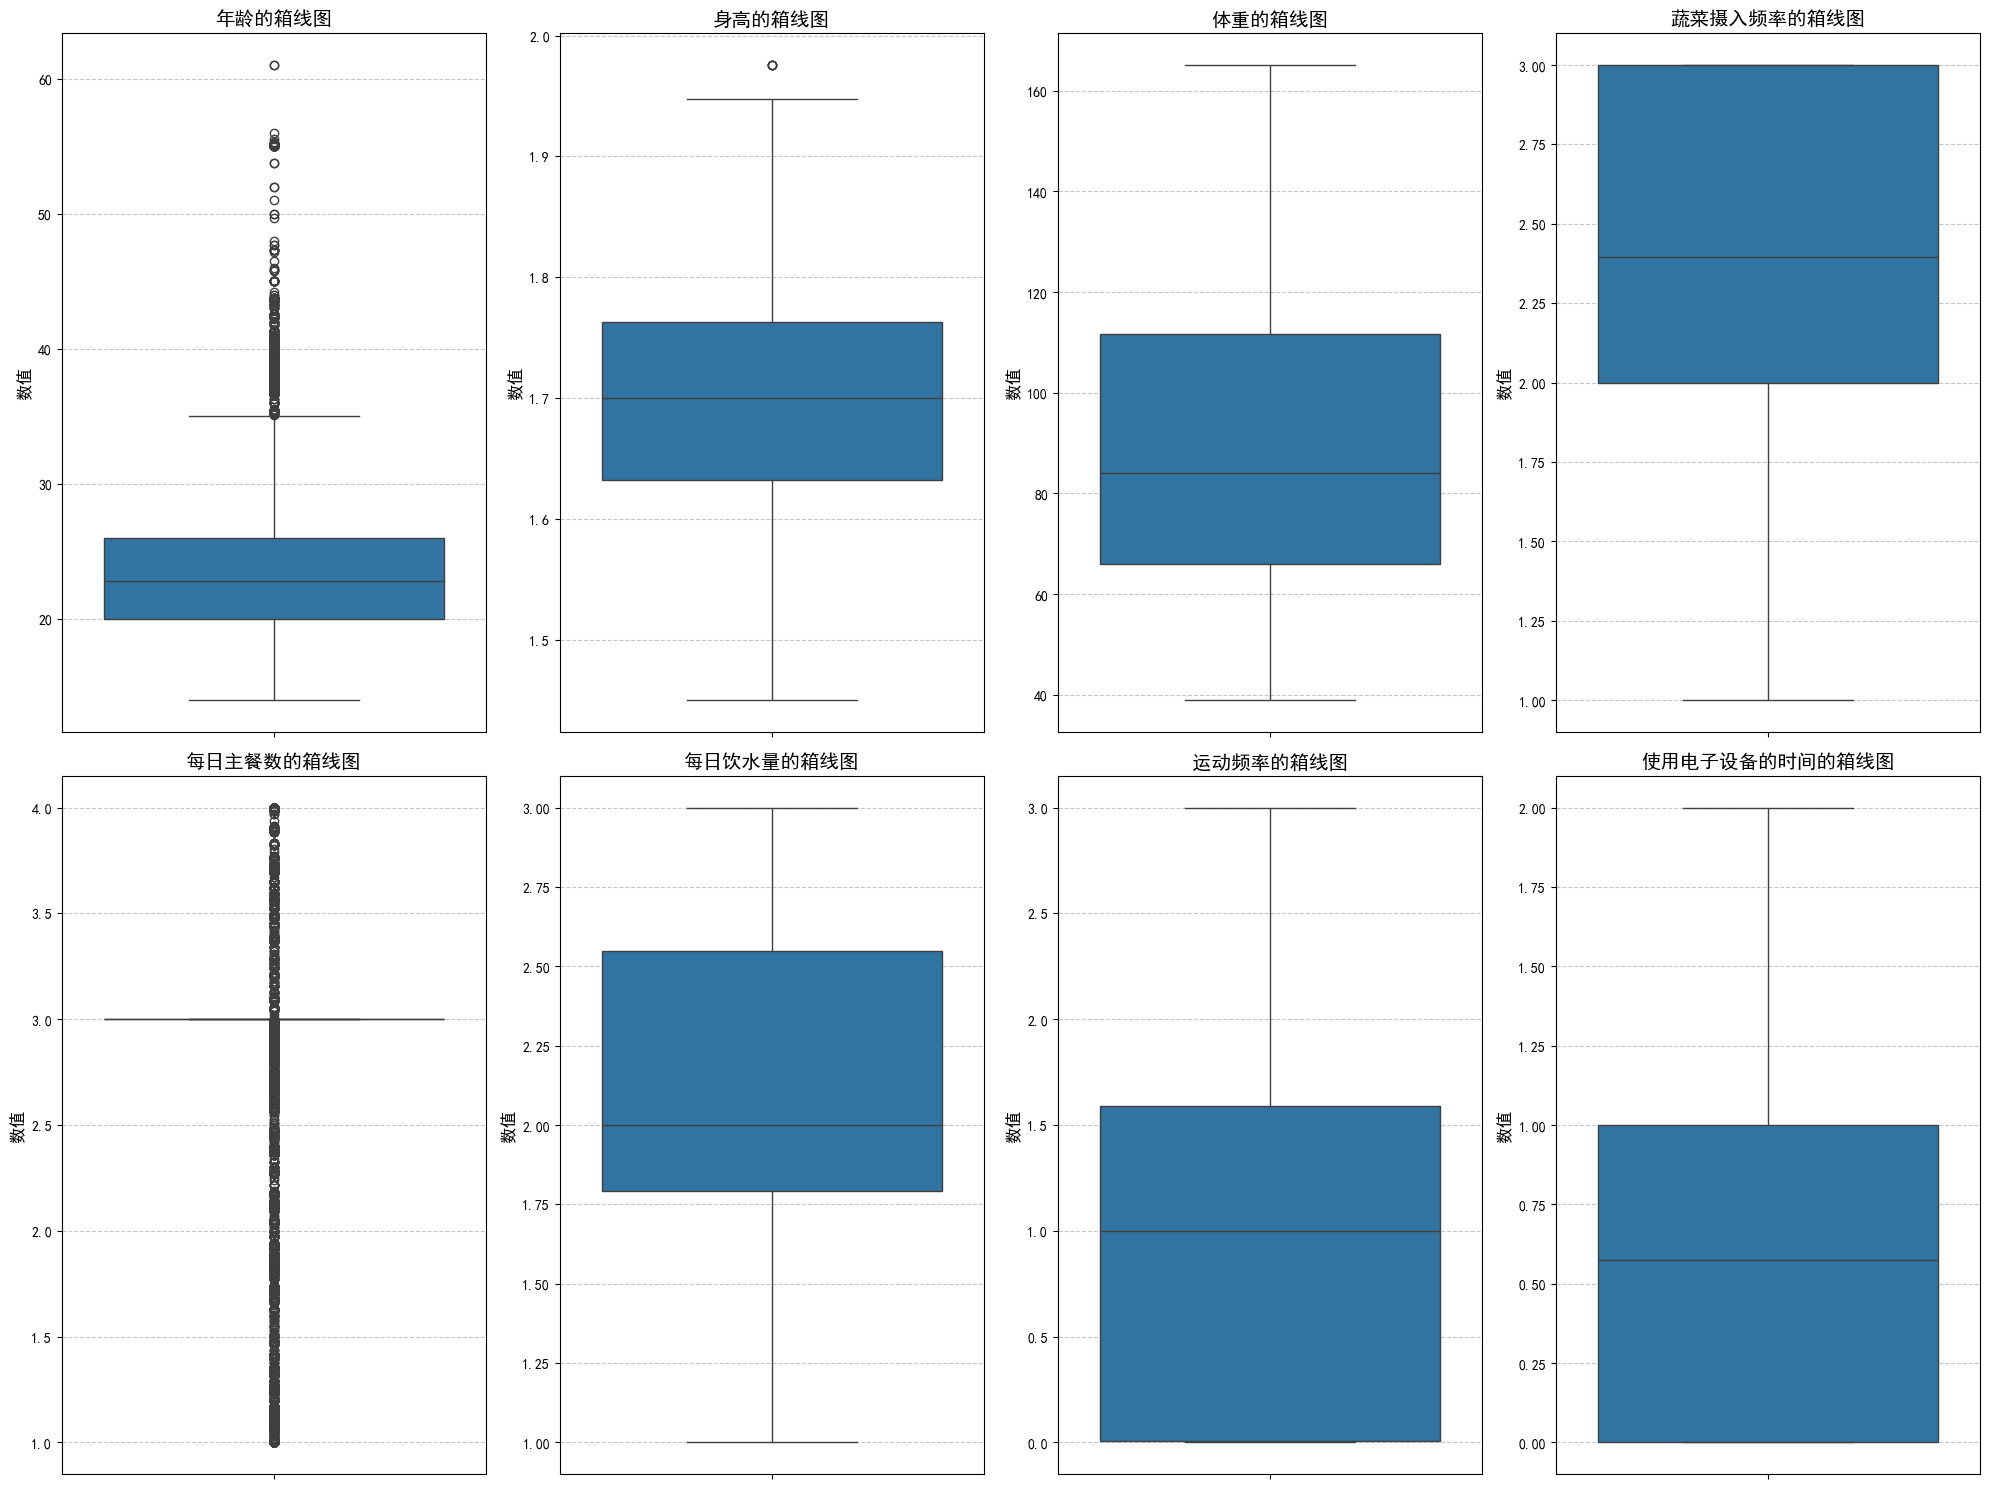

In [10]:
#绘制箱线图
plt.rcParams['font.sans-serif'] = ['SimHei'] 
feature_map = {
    'Age': '年龄',
    'Height': '身高',
    'Weight': '体重',
    'FCVC': '蔬菜摄入频率',
    'NCP': '每日主餐数',
    'CH2O': '每日饮水量',
    'FAF': '运动频率',
    'TUE': '使用电子设备的时间'
}
plt.figure(figsize=(20, 15))

for i, (col, col_name) in enumerate(feature_map.items(), 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=data[col])
    plt.title(f'{col_name}的箱线图', fontsize=14)
    plt.ylabel('数值', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [11]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# columns_encode=['Gender']
# for column in columns_encode:
#     data[column]=encoder.fit_transform(data[column])

In [12]:
data.drop('id',axis=1,inplace=True)
data['NCP']=data['NCP'].astype(int)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
data.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.663407,0.011803,2.029418,0.033096,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.758286,0.108000,0.608467,0.178891,0.838302,0.602113
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [14]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"  # 在屏幕上显示高清图片
# your code
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [15]:
data['CAEC']=data['CAEC'].astype(str)
data['CALC']=data['CALC'].astype(str)
data['Gender'] = data['Gender'].map({'Female':0,'Male':1})
data['MTRANS'] = data['MTRANS'].map({'Public_Transportation':0,'Automobile':1,'Walking':2,'Motorbike':3,'Bike':4})
data['CAEC'] = data['CAEC'].map({'0': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
data['CALC'] = data['CALC'].map({'0': 0, 'Sometimes': 1, 'Frequently': 2})
obe1dad_mapping = {
    'Insufficient_Weight': 0,
    '0rmal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
data['0be1dad'] = data['0be1dad'].map(obe1dad_mapping)
features = data.drop(['Gender','MTRANS'],axis=1).columns.tolist()

In [16]:
data_cor=data[features].corr()
data_cor

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,0be1dad
Age,1.000000,-0.011713,0.283381,0.261575,0.056848,0.034414,-0.082636,-0.151498,0.056006,-0.016325,-0.108855,-0.192259,-0.296154,0.070323,0.356211
Height,-0.011713,1.000000,0.416677,0.228137,0.115566,-0.071546,0.140000,-0.069003,0.069748,0.183706,-0.095923,0.295278,0.076433,0.089138,0.150141
Weight,0.283381,0.416677,1.000000,0.514147,0.228770,0.245682,0.080616,-0.337331,0.040416,0.317914,-0.185116,-0.084845,-0.086471,0.216673,0.921250
family_history_with_overweight,0.261575,0.228137,0.514147,1.000000,0.152154,0.047756,0.015829,-0.204263,0.018782,0.191588,-0.166760,-0.094414,0.005762,-0.002330,0.522026
FAVC,0.056848,0.115566,0.228770,0.152154,1.000000,0.006952,0.001184,-0.115675,-0.016009,0.039167,-0.111897,-0.067030,0.034843,0.080184,0.215401
FCVC,0.034414,-0.071546,0.245682,0.047756,0.006952,1.000000,0.134506,0.010870,-0.012191,0.101299,0.022120,-0.089822,-0.147843,0.128793,0.272933
NCP,-0.082636,0.140000,0.080616,0.015829,0.001184,0.134506,1.000000,0.113323,0.015569,0.095783,0.012515,0.084675,0.076047,0.124096,0.022268
CAEC,-0.151498,-0.069003,-0.337331,-0.204263,-0.115675,0.010870,0.113323,1.000000,0.019703,-0.132820,0.099427,0.092035,0.049646,-0.066821,-0.364052
SMOKE,0.056006,0.069748,0.040416,0.018782,-0.016009,-0.012191,0.015569,0.019703,1.000000,-0.023475,0.017185,0.008374,-0.016093,0.023254,0.013501
CH2O,-0.016325,0.183706,0.317914,0.191588,0.039167,0.101299,0.095783,-0.132820,-0.023475,1.000000,-0.031720,0.082932,-0.010654,0.082735,0.273154


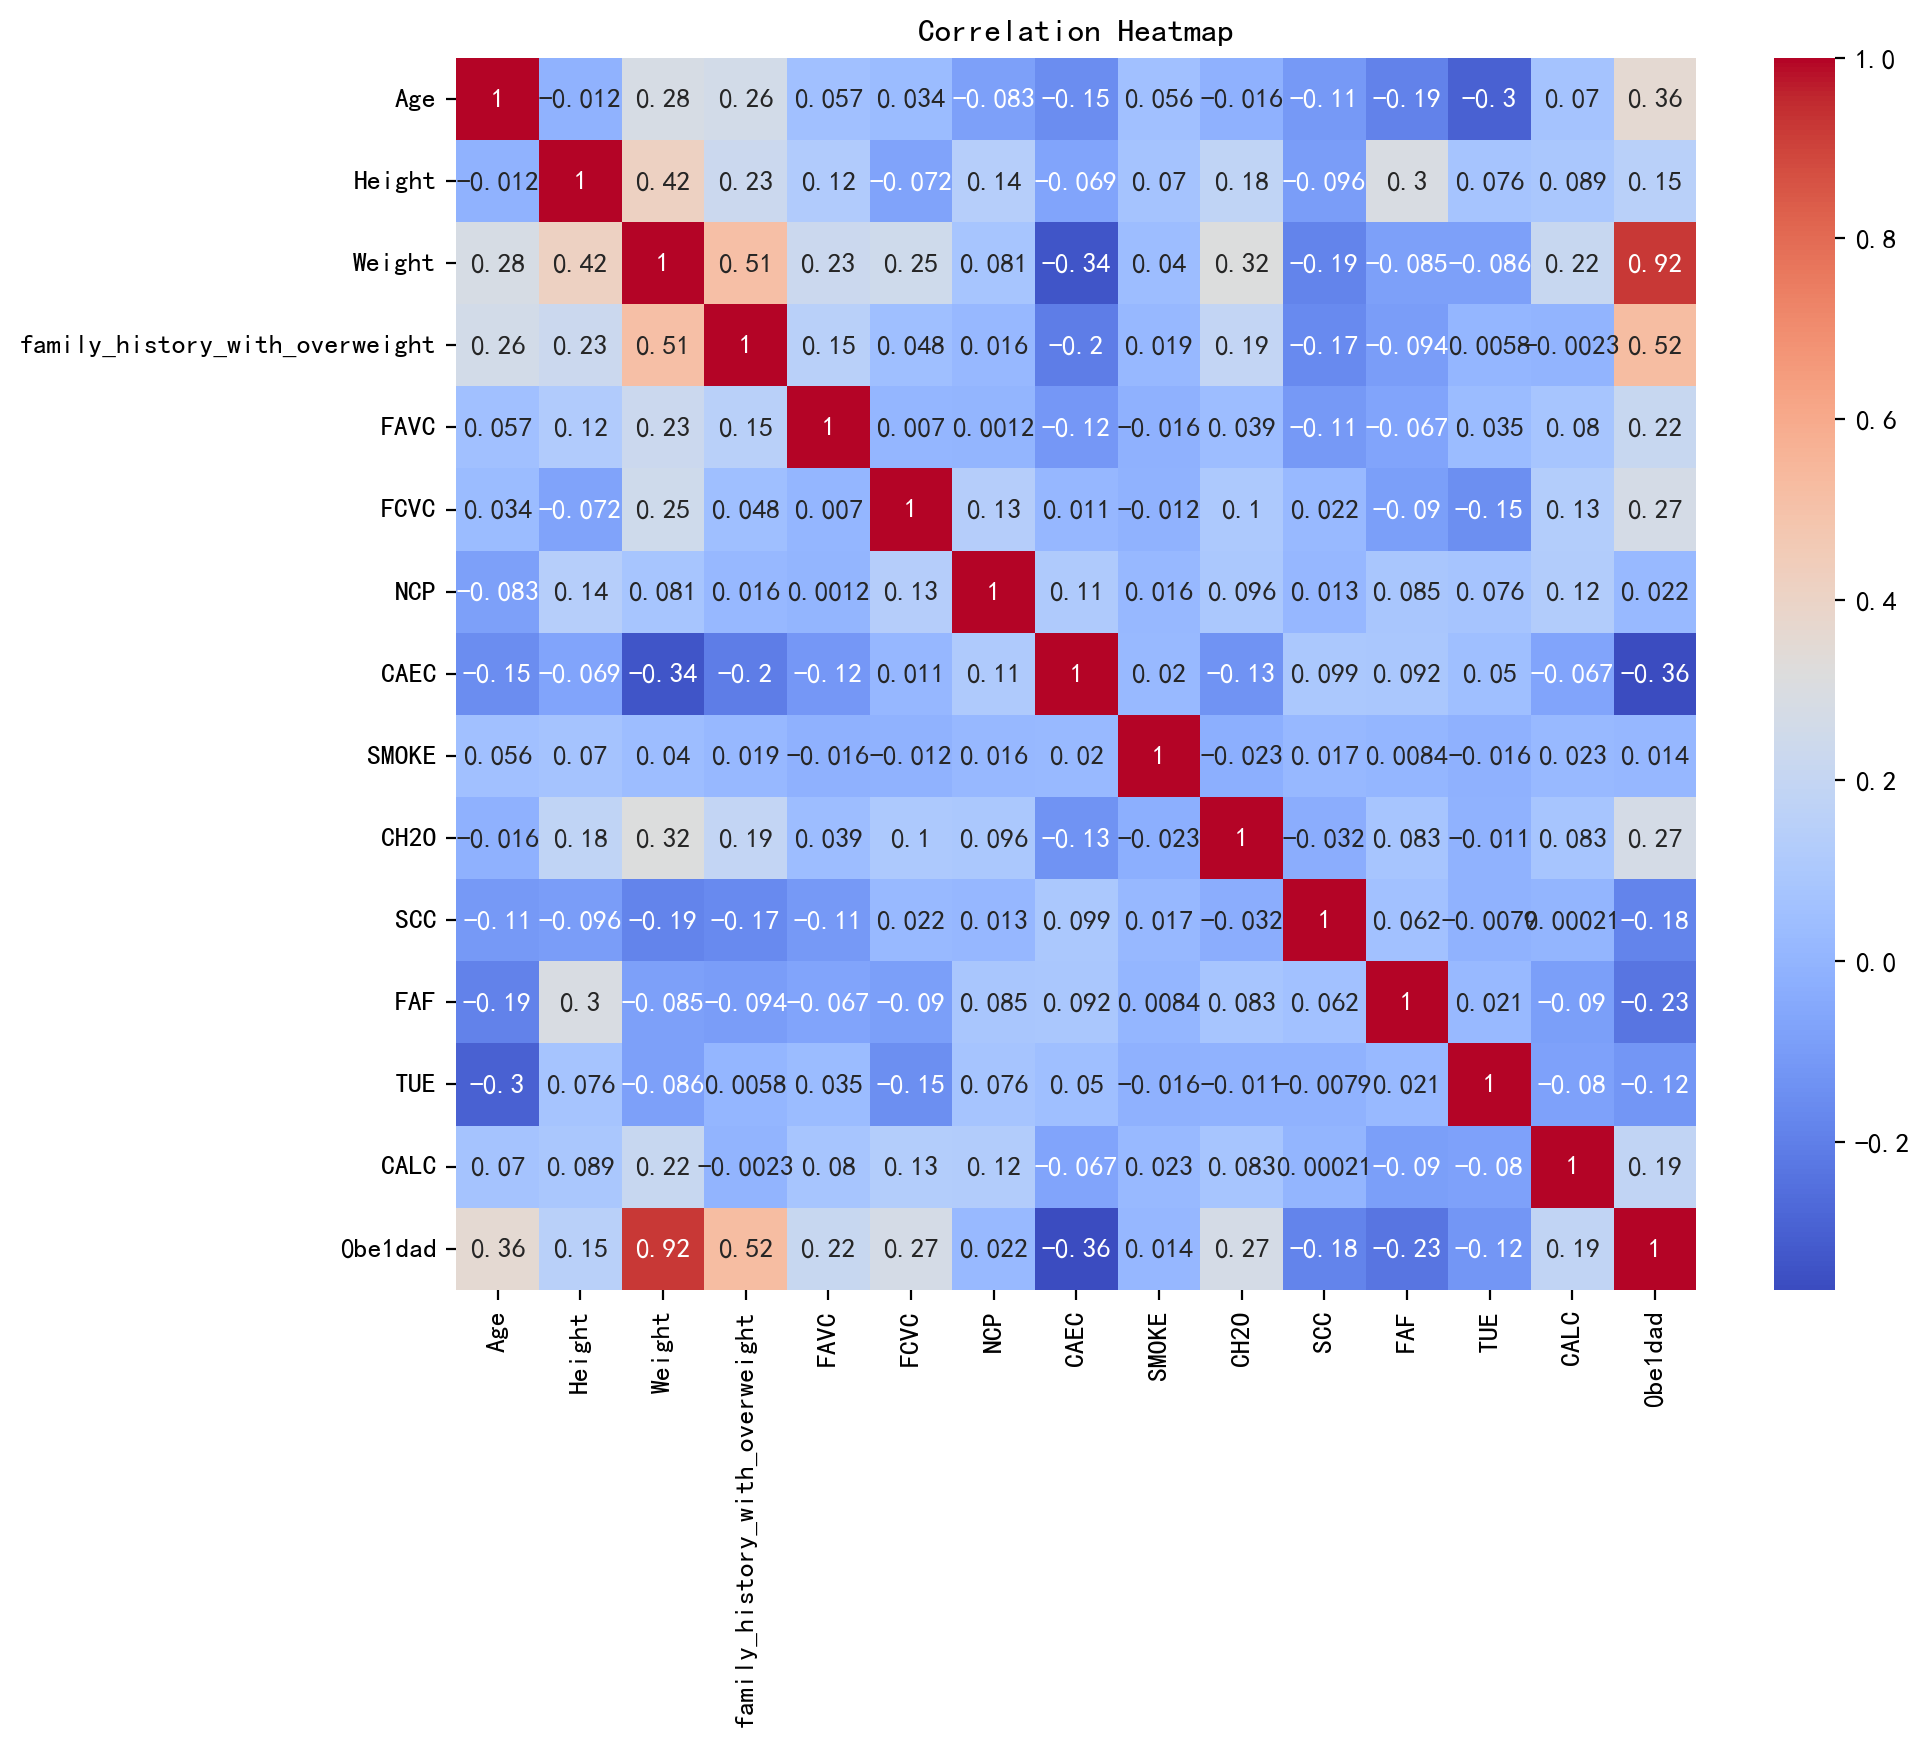

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data_cor,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
###相关性比较低的有：Height(0.15)  NCP(0.022) SMOKE(0.014)
###SCC(-0.18)  TuE(-0.12) CALC(0.19)

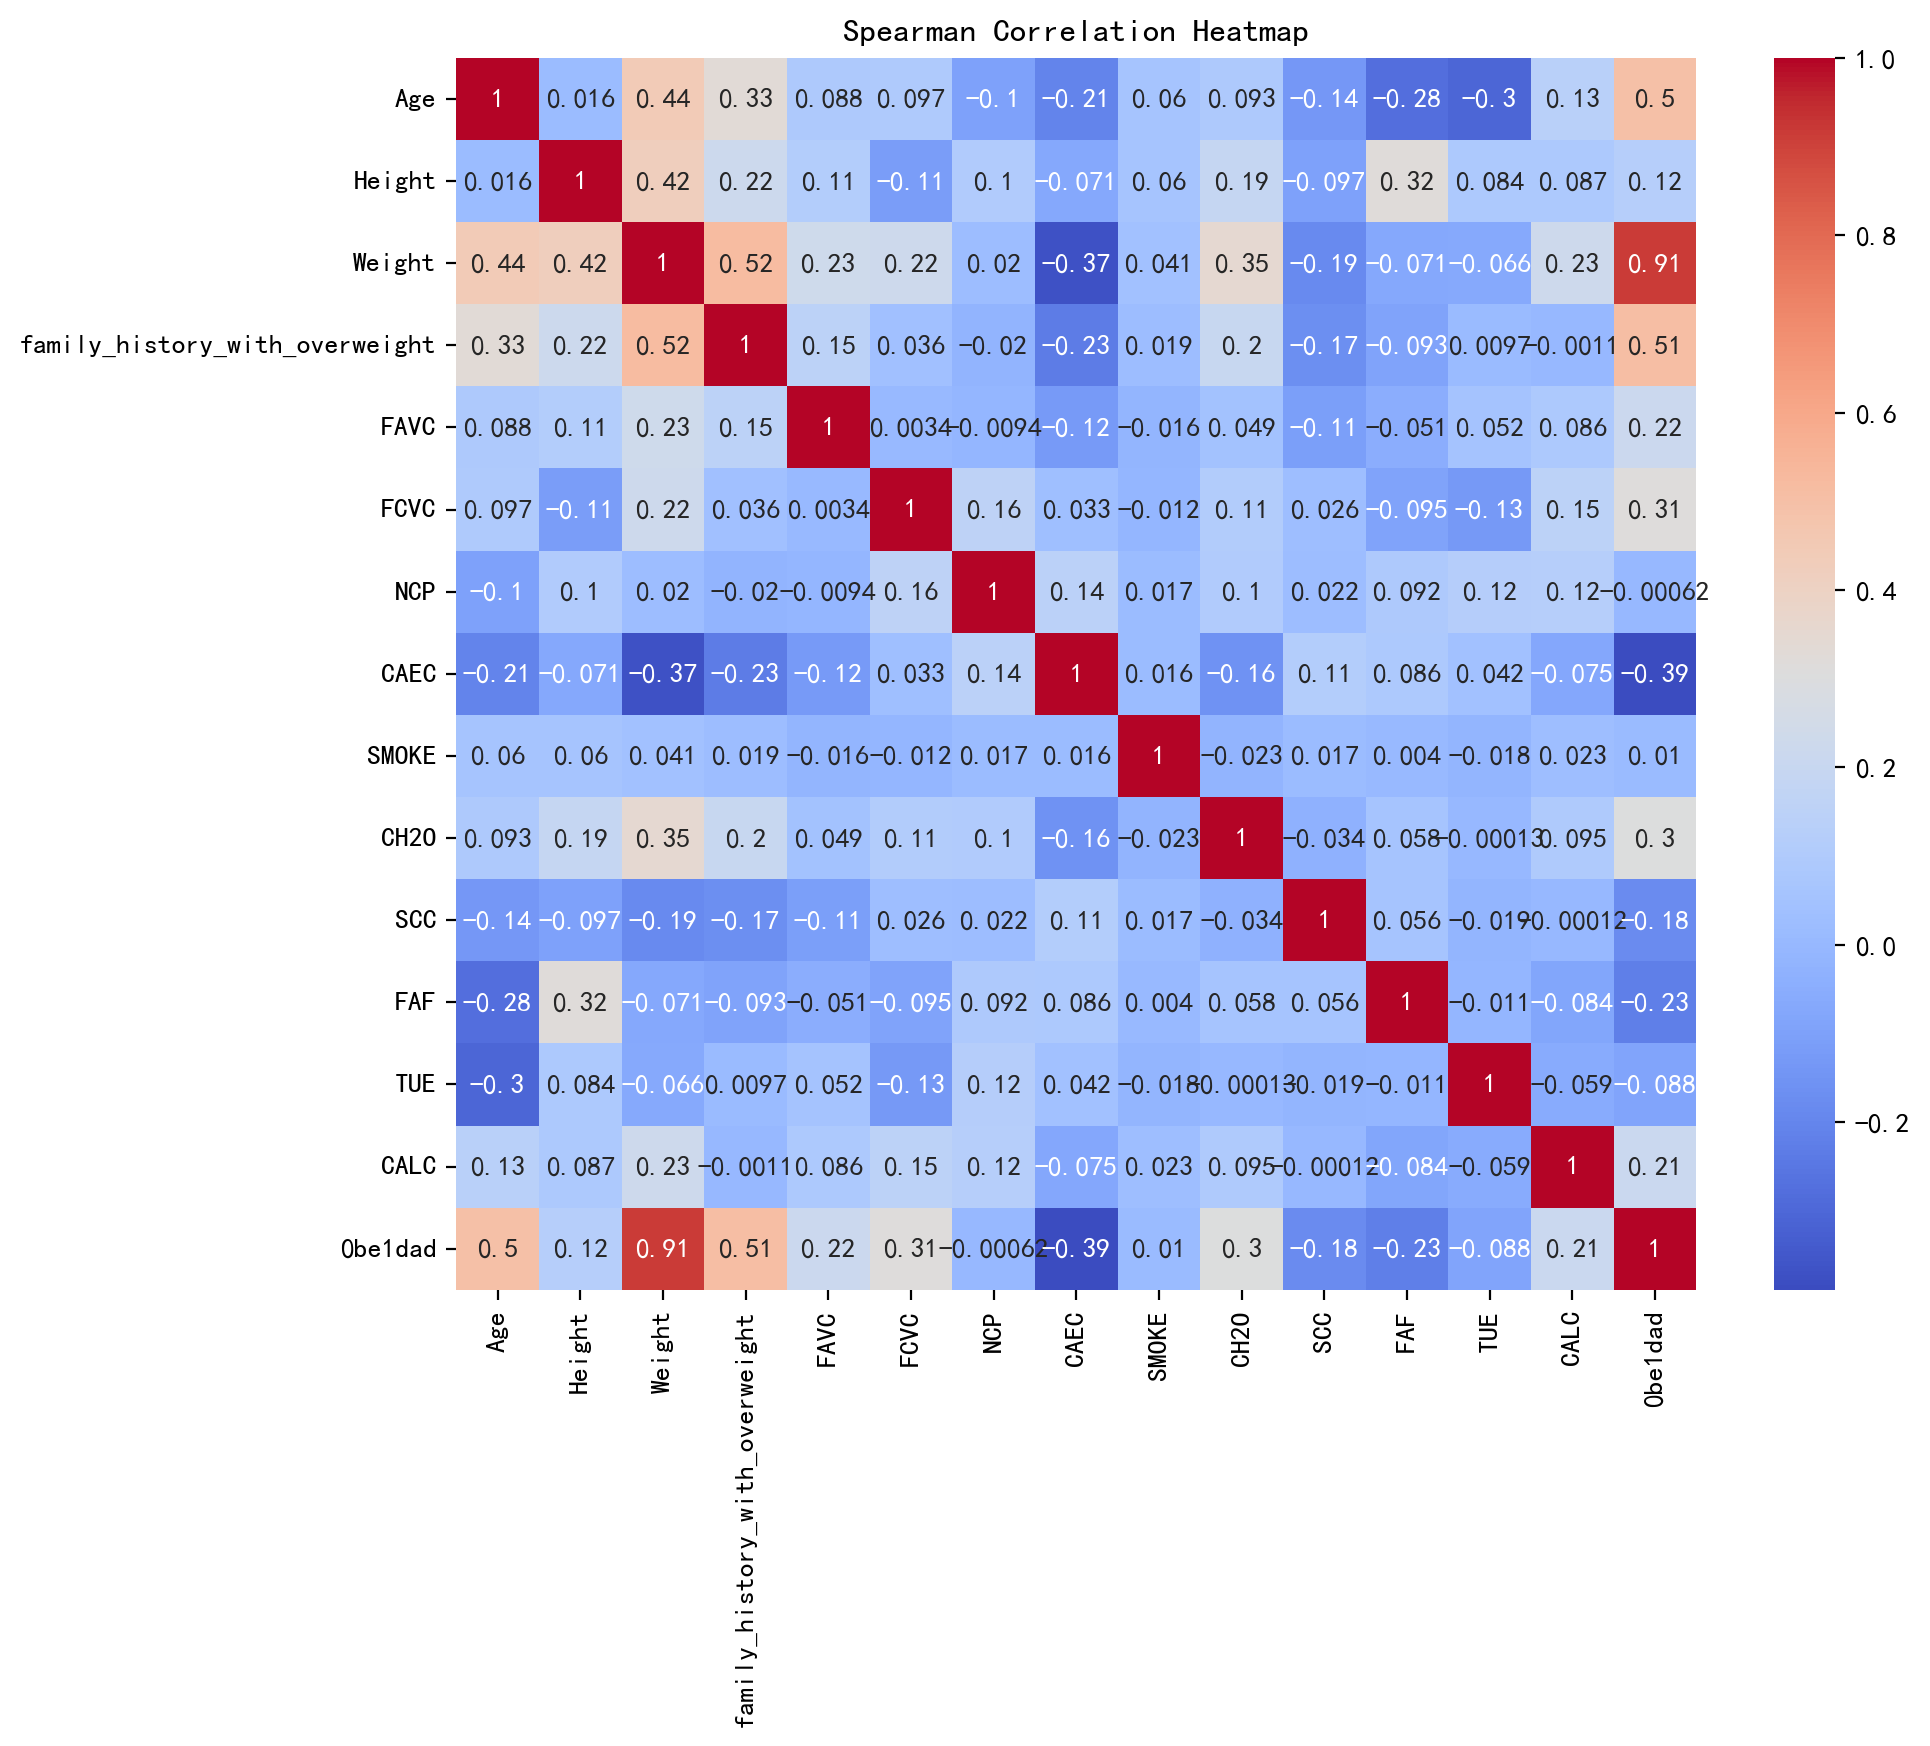

In [19]:
data_cor_spearman=data[features].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(data_cor_spearman,annot=True,cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

In [20]:
# 卡方检验
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['MTRANS'], data['0be1dad'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f'MTRANS:Chi-Square:{chi2},P-Value:{p}')

MTRANS:Chi-Square:2349.0825677782323,P-Value:0.0


In [21]:
crosstab = pd.crosstab(data['Gender'], data['0be1dad'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f'MTRANS:Chi-Square:{chi2},P-Value:{p}')

MTRANS:Chi-Square:7953.7675442853715,P-Value:0.0


In [22]:
###相关性比较低的有：Height(0.15)  NCP(0.022) SMOKE(0.014) SCC(-0.18)  TuE(-0.12) CALC(0.19)

In [23]:
data2 = data.copy()
data2.drop(['NCP','SMOKE','TUE','Height', 'Weight'],axis=1,inplace=True)
data2.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,CAEC,CH2O,SCC,FAF,CALC,MTRANS,0be1dad
0,1,24.443011,1,1,2.000000,1,2.763573,0,0.000000,1,0,3
1,0,18.000000,1,1,2.000000,2,2.000000,0,1.000000,0,1,1
2,0,18.000000,1,1,1.880534,1,1.910378,0,0.866045,0,0,0
3,0,20.952737,1,1,3.000000,1,1.674061,0,1.467863,1,0,6
4,1,31.641081,1,1,2.679664,1,1.979848,0,1.967973,1,0,3
